In [11]:
model.save("mnist_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


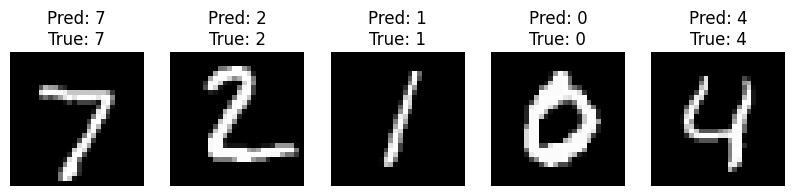

In [8]:
import numpy as np

predictions = model.predict(x_test[:5])

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis("off")
plt.show()


313/313 - 6s - 18ms/step - accuracy: 0.9907 - loss: 0.0324

Test accuracy: 0.9907000064849854


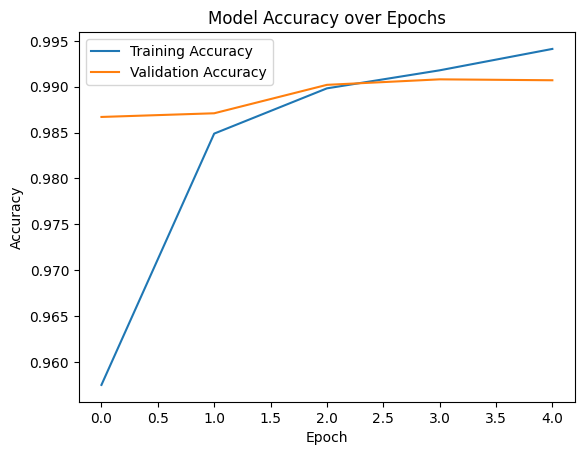

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot training vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 93ms/step - accuracy: 0.9575 - loss: 0.1401 - val_accuracy: 0.9867 - val_loss: 0.0460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 190s 101ms/step - accuracy: 0.9849 - loss: 0.0476 - val_accuracy: 0.9871 - val_loss: 0.0396
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 99ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9902 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 78ms/step - accuracy: 0.9918 - loss: 0.0251 - val_accuracy: 0.9908 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 87ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9907 - val_loss: 0.0324


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


c:\Users\ROBERT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))



TensorFlow version: 2.20.0
Keras version: 3.11.3
GPU Available: []


In [1]:
!python --version

Python 3.11.3


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


ImportError: Traceback (most recent call last):
  File "c:\Users\ROBERT\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.